# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [4]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

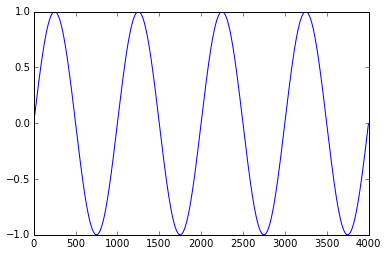

In [20]:
x = np.arange(1,5,0.001)
y = np.sin(2*np.pi*1*x)
plt.plot(y)

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

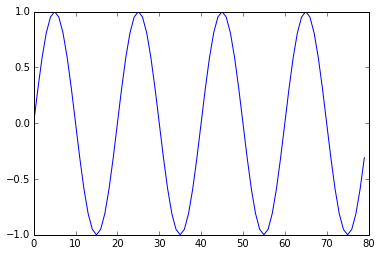

In [22]:
fs = 20
n = np.arange(1, 5, 1/fs)
y = np.sin(2* np.pi * 1 * n)
plt.plot(y)

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


<Container object of 3 artists>

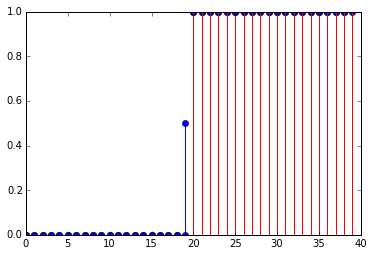

In [36]:
def step (n=0, N=20):
    s = np.zeros((N,))
    s[n:N] = 1
    return s

xmin=-20
leng=40
x = step(xmin,leng)
print (x)

y=[]
for n in range(0, len(x)-1):
        y.append( (x[n] + x[n+1]) /2)
print(y)

plt.stem(y)
plt.stem(x, 'r')


**1.2** Propose a modification to obtain a causal version

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.]
[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


<Container object of 3 artists>

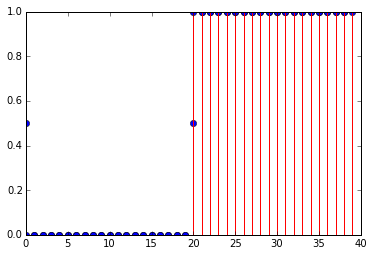

In [39]:

##the system is not causal because there is dependance in the future elements
##to make it casual we have to eliminate the dependency on k+1. 


def step (n=0, N=20):
    s = np.zeros((N,))
    s[n:N] = 1
    return s

xmin=-20
leng=40
x = step(xmin,leng)
print (x)

y=[]
for k in range(0, len(x)-1):
    # We change the n+1 to  n-1 to make it causal
        y.append( (x[k] + x[k-1]) /2)
print(y)

plt.stem(y)
plt.stem(x, 'r')

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


<Container object of 3 artists>

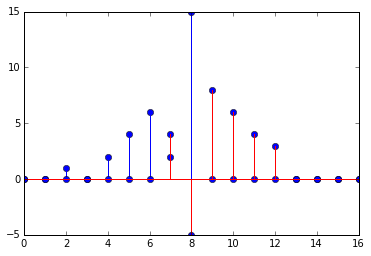

In [73]:
xa = np.array ([0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
xb = np.array ([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0])
        
#response to ya
ya=[]
for k in range(1, len(xa)-1):
        ya.append(3*xa[k-1] - 2*xa[k] + xa[k+1])

#response to yb
yb=[]
for k in range(1, len(xb)-1):
        yb.append(3*xb[k-1] - 2*xb[k] + xb[k+1])
              
plt.stem(ya)
plt.stem(yb, 'r')


**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


**3.3** Propose a nonlinear/noninvariant system.